In [1]:
import numpy as np
import pandas as pd
import fastparquet
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import HTML,display
from functions import normal_th, binom
import random
import scipy.stats as sci
import matplotlib.pyplot as plt
import time
import matplotlib.pylab as pylab
#------------------------------------------------------------------------------

# Question 0 - Topics in Pandas

## Missing Data in pandas

- About
- Calculations with missing data
- Filling missing values
- Interpolation
- Replacing generic values

## About

Missing values are always present in datasets that are developed from the 
real world , and it is important to understand the functions and 
methods that are present to deal with them properly.

In [2]:
df = pd.DataFrame({'Name' : ['A' , 'B', 'C', 'D', 'E'],
                   'Score 1' :[90, 85, 86, 67, 45],
                   'Score 2' :[None , 78, 89, 56, 99], 
                   'Score 3' :[80, None , None, 56, 82],
                   'Score 4' : [68, 79, None , 26, 57]})

In [3]:
df

,Name,Score 1,Score 2,Score 3,Score 4
0,A,90,NaN,80.0,68.0
1,B,85,78.0,NaN,79.0
2,C,86,89.0,NaN,NaN
3,D,67,56.0,56.0,26.0
4,E,45,99.0,82.0,57.0


### Defining missing values

In the dataset defined above, we can see that 
there are few "NaN" of missing values.  
- The missing or not avialable value is defined using `np.nan`.
- We can find the missing values in a dataset using `isna()`. 
The values that show 'True' are missing in the dataset
- On the other hand, to find if a value is not null we use `notna()`

In [4]:
print(df.isna())
print('\n')
print(df.notna())

    Name  Score 1  Score 2  Score 3  Score 4
0  False    False     True    False    False
1  False    False    False     True    False
2  False    False    False     True     True
3  False    False    False    False    False
4  False    False    False    False    False


   Name  Score 1  Score 2  Score 3  Score 4
0  True     True    False     True     True
1  True     True     True    False     True
2  True     True     True    False    False
3  True     True     True     True     True
4  True     True     True     True     True


- We can also use `np.nan()` as a 
parameter to compare various values  
- Using `isna()` to find the missing values in each column

In [5]:
print(df['Score 1'].isna())
print(df['Score 2'].isna())

0    False
1    False
2    False
3    False
4    False
Name: Score 1, dtype: bool
0     True
1    False
2    False
3    False
4    False
Name: Score 2, dtype: bool


## Calculations with missing data

There is missing values in our dataset. But 
there are several different ways we can 
handle this to perform calculations.

Suppose, we want to calculate 
the average of scores for each person. 
We can use these three methods.
- Skip the missing values
- Drop the column with missing values
- Fill in the missing values with some other value

Note : "NA'" values are automatically excluded while using groupby

In [6]:
# Skipping missing values
print(df.mean(skipna = True, axis = 1))

0    79.333333
1    80.666667
2    87.500000
3    51.250000
4    70.750000
dtype: float64


In [7]:
# Dropping columns or rows with missing values

print(df.dropna(axis = 0)) #Row
print("\n")
print(df.dropna(axis = 1)) #Column

  Name  Score 1  Score 2  Score 3  Score 4
3    D       67     56.0     56.0     26.0
4    E       45     99.0     82.0     57.0


  Name  Score 1
0    A       90
1    B       85
2    C       86
3    D       67
4    E       45


## Filling missing values

We can fill the missing values using different methods:

- Filling missing values with 0
- Filling missing values with a string - eg. NA
- Filling missing with values with values 
appearing before or after
- Filling values with mean of a column

In [8]:
# Filling values with 0
df.fillna(0)
# Filling values with a string
df.fillna("NA")

,Name,Score 1,Score 2,Score 3,Score 4
0,A,90,NA,80.0,68.0
1,B,85,78.0,NA,79.0
2,C,86,89.0,NA,NA
3,D,67,56.0,56.0,26.0
4,E,45,99.0,82.0,57.0


In [9]:
# Filling values with values appearing after the
# missing values
df.fillna(method = "pad")

,Name,Score 1,Score 2,Score 3,Score 4
0,A,90,NaN,80.0,68.0
1,B,85,78.0,80.0,79.0
2,C,86,89.0,80.0,79.0
3,D,67,56.0,56.0,26.0
4,E,45,99.0,82.0,57.0


In [10]:
# Filling values with mean of individual columns
print(df.fillna(df.mean()))

  Name  Score 1  Score 2    Score 3  Score 4
0    A       90     80.5  80.000000     68.0
1    B       85     78.0  72.666667     79.0
2    C       86     89.0  72.666667     57.5
3    D       67     56.0  56.000000     26.0
4    E       45     99.0  82.000000     57.0


## Interpolation

This is the process of performing linear interpolation 
to give an expectation assumption of missing values.

There are several different methods of interpolation

- linear : default method
- quadratic
- pchip
- akima
- spline
- polynomial

In [11]:
df.interpolate()

,Name,Score 1,Score 2,Score 3,Score 4
0,A,90,NaN,80.0,68.0
1,B,85,78.0,72.0,79.0
2,C,86,89.0,64.0,52.5
3,D,67,56.0,56.0,26.0
4,E,45,99.0,82.0,57.0


In [12]:
df.interpolate(method = "akima")

,Name,Score 1,Score 2,Score 3,Score 4
0,A,90,NaN,80.000000,68.0
1,B,85,78.0,60.666667,79.0
2,C,86,89.0,52.666667,52.5
3,D,67,56.0,56.000000,26.0
4,E,45,99.0,82.000000,57.0


Below, we can see that the missing values in 
`Score 3` is replaced by 55 and 45 respectively

In [13]:
df.interpolate(method = "quadratic")

,Name,Score 1,Score 2,Score 3,Score 4
0,A,90,NaN,80.0,68.000000
1,B,85,78.0,55.0,79.000000
2,C,86,89.0,47.0,49.166667
3,D,67,56.0,56.0,26.000000
4,E,45,99.0,82.0,57.000000


## Replacing generic values

We can simply replace the NaN values from the outside,
by using `.replace()`  

Here, we can assume and replace the value with a random
value with 75.

In [14]:
df.replace(np.nan, 75)

,Name,Score 1,Score 2,Score 3,Score 4
0,A,90,75.0,80.0,68.0
1,B,85,78.0,75.0,79.0
2,C,86,89.0,75.0,75.0
3,D,67,56.0,56.0,26.0
4,E,45,99.0,82.0,57.0


# Question 1 - NHANES Table 1

### a.

In [15]:
# Added RIAGENDR column from Nhanes Demo Dataset
nhanes_data1 = pd.read_parquet('Nhanes Data.parquet')

In [16]:
nhanes_data1

,age,gender,race,education_level,marital,interview_status,psuedo_PSU_var,psuedo_stratum_var,sample_weight_MEC,sample_weight_int,cohort
SEQN,,,,,,,,,,,
62161.0,22,male,non-hispanic White,hs graduate,never married,both,1,91,104236.582554,102641.406474,Gen Y
62162.0,3,female,mexican,NaN,NaN,both,3,92,16116.354010,15457.736897,Gen Z
62163.0,14,male,non-hispanic Asian,NaN,NaN,both,3,90,7869.485117,7397.684828,Gen Z
62164.0,44,female,non-hispanic White,college,married,both,1,94,127965.226204,127351.373299,Gen X
62165.0,14,female,non-hispanic black,NaN,NaN,both,2,90,13384.042162,12209.744980,Gen Z
...,...,...,...,...,...,...,...,...,...,...,...
102952.0,70,female,non-hispanic Asian,hs graduate,married,both,2,138,18338.711104,16896.276203,Baby Boomer
102953.0,42,male,mexican,hs graduate,separated,both,2,137,63661.951573,61630.380013,Gen X
102954.0,41,female,non-hispanic black,college graduate,never married,both,1,144,17694.783346,17160.895269,Baby Boomer


In [17]:
oral_data1 = pd.read_parquet('Oral Data.parquet')

### b. 

In [18]:
def under_20(val):
    """
    Finding the rows with age<20
    
    Parameters
    ----------
    val : int
    Specifies the age

    Returns
    -------
    String
    Whether over or under 20
    """
    if(val < 20):
        return 'Under 20'
    else:
        return 'Over 20'

In [19]:
def edu(val, age):
    """
    Finding the rows with based on different college experience
    
    Parameters
    ----------
    val : string
    Specifies the college value
    age: int
    Specifies the age

    Returns
    -------
    string
    Whether has or does not have college experience
    """
    if(val == 'college' or val == 'college graduate'):
        return 'some college/college graduate'
    elif(age < 20):
        return 'No college/<20'
    else:
        return 'No college/<20'

In [20]:
nhanes_rev = nhanes_data1.reset_index()
nhanes_rev = nhanes_rev.loc[:,['SEQN', 'gender', 'age',
                              'education_level', 'interview_status']]
nhanes_rev['under_20'] = nhanes_rev['age'].apply(under_20)
nhanes_rev['college'] = nhanes_rev.apply(lambda x: edu(x['education_level']
                                                     , x['age']), axis=1)
# Joining both the datasets
nhanes_temp = nhanes_rev.join(oral_data1, on = ['SEQN'], how = 'left')
nhanes_rev['ohx_status'] = nhanes_temp['dentition_status']

#Renaming columns
nhanes_rev = nhanes_rev.rename(columns = {'SEQN' : 'id',
                             'interview_status' : 'exam_status',})

In [21]:
nhanes_rev = nhanes_rev.drop(['education_level'], axis = 1)

In [22]:
nhanes_rev['id'] = nhanes_rev['id'].astype('int')
nhanes_rev['gender'] = nhanes_rev['gender'].astype('category')
nhanes_rev['exam_status'] = nhanes_rev['exam_status'].astype('category')
nhanes_rev['under_20'] = nhanes_rev['under_20'].astype('category')
nhanes_rev['college'] = nhanes_rev['college'].astype('category')
nhanes_rev['ohx_status'] = nhanes_rev['ohx_status'].astype('category')

In [23]:
def dentition(dent, exam):
    """
    Used to decide between complete and missing
    
    Parameters
    ----------
    dent : string
    Specifies the dent val
    exam : string
    Specifies the exam val

    Returns
    -------
    string
    Complete or Missing
    """
    if(exam == 'both' and dent == 'complete'):
        return 'complete'
    else:
        return 'missing'

In [24]:
nhanes_rev['ohx'] = nhanes_rev.apply(lambda x: dentition(x['ohx_status']
                                                , x['exam_status']), axis = 1)
nhanes_rev['ohx'] = nhanes_rev['ohx'].astype('category')

In [25]:
display(HTML(nhanes_rev.head().to_html()))

,id,gender,age,exam_status,under_20,college,ohx_status,ohx
0,62161,male,22,both,Over 20,No college/<20,complete,complete
1,62162,female,3,both,Under 20,No college/<20,complete,complete
2,62163,male,14,both,Under 20,No college/<20,complete,complete
3,62164,female,44,both,Over 20,some college/college graduate,complete,complete
4,62165,female,14,both,Under 20,No college/<20,complete,complete


In [26]:
nhanes_rev.dtypes

id                int64
gender         category
age               int64
exam_status    category
under_20       category
college        category
ohx_status     category
ohx            category
dtype: object

In [27]:
nhanes_rev.to_parquet('Demo_data.parquet')

### c.

In [28]:
drop_rows = nhanes_rev.query('exam_status != "both"').index
nhanes_rev1 = nhanes_rev.drop(drop_rows)
print('Number of rows removed: ' + str(len(drop_rows)))
print('Number of rows remaining: ' + str(len(nhanes_rev1)))

Number of rows removed: 1757
Number of rows remaining: 37399


### d.

In [29]:
nhanes_rev_group = (nhanes_rev1
               .groupby(by = ['under_20','ohx'])
               .size())
nhanes_rev_group1 = (nhanes_rev1
               .groupby(by = ['gender','ohx'])
               .size())
nhanes_rev_group2 = (nhanes_rev1
               .groupby(by = ['college','ohx'])
               .size())
nhanes_rev_group3 = (nhanes_rev1
               .groupby(by = ['ohx'])['age']
               .mean())
nhanes_rev_group4 = (nhanes_rev1
               .groupby(by = ['ohx'])['age']
               .std())

In [30]:
nhanes_rev_group3 = pd.DataFrame(nhanes_rev_group3)
nhanes_rev_group4 = pd.DataFrame(nhanes_rev_group4)
nhanes_rev_age = (round(nhanes_rev_group3['age'], 2).astype(str) + 
                     ' (' + round(nhanes_rev_group4['age'], 2).astype(str) + 
                     ')')
#Transpose the age-table
nhanes_rev_age = pd.DataFrame(nhanes_rev_age)
nhanes_rev_age = nhanes_rev_age.T

In [31]:
nhanes_rev_group = nhanes_rev_group.unstack()
nhanes_rev_group1 = nhanes_rev_group1.unstack()
nhanes_rev_group2 = nhanes_rev_group2.unstack()

In [32]:
#Chi- Square test for under_20
p_value_20 = sci.chi2_contingency(nhanes_rev_group)[1]
#Chi- Square test for gender
p_value_gender = sci.chi2_contingency(nhanes_rev_group1)[1]
#Chi- Square test for college
p_value_college = sci.chi2_contingency(nhanes_rev_group2)[1]
# T-test for age
p_value_age = sci.ttest_ind(nhanes_rev1['age'][nhanes_rev1['ohx'] == 'complete'],
                     nhanes_rev1['age'][nhanes_rev1['ohx'] == 'missing'])[1]

In [33]:
def combine(df):
    df1 = pd.DataFrame()
    df['percent_complete'] = (df['complete']/ (df['complete'] + 
                                               df['missing']) * 100)
    df['percent_missing'] = (df['missing']/ (df['complete'] + 
                                             df['missing']) * 100)
    df1['complete'] = (df['complete'].astype(str) + ' (' +
                      round(df['percent_complete'], 3).astype(str) +'%)')
    df1['missing'] = (df['missing'].astype(str) + ' (' +
                      round(df['percent_missing'], 3).astype(str) +'%)')
    return df1

In [34]:
nhanes_20 = combine(nhanes_rev_group)
nhanes_gender = combine(nhanes_rev_group1)
nhanes_college = combine(nhanes_rev_group2)

In [35]:
#Merging the three datasets
merged_df = pd.concat([nhanes_20, nhanes_gender])
merged2 = pd.concat([merged_df,nhanes_college])
nhanes_groups = pd.concat([merged2,nhanes_rev_age])
# Index headers
headers = ['Under_20', 'Under_20', 'Gender','Gender', 
           'College','College', 'Age']
# P-value lsits
p_vals = [format(p_value_20, '.3g'), '-', 
          p_value_gender, '-', 
          format(p_value_college, '.3g'), '-', 
          format(p_value_age, '.3g')]
nhanes_groups['cols'] = headers
nhanes_groups = nhanes_groups.reset_index()
nhanes_groups = nhanes_groups.set_index(['cols', 'index'])
nhanes_groups['p value'] = p_vals

In [36]:
display(HTML(nhanes_groups.to_html()))

# Question 2 - Monte Carlo Comparison

In [37]:
# creating a population numpy array using 0s and 1s
zero = np.zeros(500)
zero = zero.astype(int)
one = np.ones(1040)
one = one.astype(int)
data_test = np.concatenate((zero, one))
count = 0
for i in data_test:
    if(i == 1):
        count=count+1
p_pop = count/len(data_test)
random.shuffle(data_test)
print('Population parameter:', p_pop)

Population parameter: 0.6753246753246753


### a.

In [38]:
def monte_carlo(data_test, n):
    """
    Random sampling from the population parameter
    
    Parameters
    ----------
    data_test : list
    The population parameter
    n: int
    Length of sample
     
    Returns
    -------
    p_hat : float
    Gives the p estimate
    n_sample : float
    Gives the sample of n values
    """
    rng = np.random.default_rng()
    n_sample = rng.choice(data_test, n, replace=False)
    count = 0
    for i in n_sample:
        if(i == 1):
            count = count + i
    p_hat = count / len(n_sample)
    return p_hat,n_sample

In [39]:
def monte_sim(n, func, n_times = 1000, norm = True):
    """
    Give a monte carlo simulation
    
    Parameters
    ----------
    n : int
    Gives the n of the random sample
    func: int
    Function number
    n_times:
    The number of times the simulation is run
     
    Returns
    -------
    val/n_times : The average confidence level
    rounded lower values: list
    rounded upper values: list
    """
    val = 0
    lower = 0
    upper = 0
    inter_lwr = []
    inter_upr = []
    for i in range(0, n_times):
        p_hat, n_sample = monte_carlo(data_test, n)
        if(norm == True):
            val_dict = normal_th(n_sample, 95, str_par = None)
        else:
            val_dict = binom(n_sample , 95, func, str_par = None)
        if(p_pop > val_dict['lwr'] and p_pop < val_dict['upr']):
            val = val + 1
        value = round(val / n_times, ndigits = 5)
        lower = lower + val_dict['lwr']
        upper = upper + val_dict['upr']
        # Taking the lower bound an upper bound of confidence intervals
        lowers = round(lower / n_times, ndigits = 3)
        uppers = round(upper / n_times, ndigits = 3)
    return value, p_hat, lowers, uppers 

In [40]:
# Finding the minumum number of monte carlo replicates required
z = sci.norm.ppf(0.975)
n_min = (200 * z * np.sqrt(0.95 * 0.05)) ** 2
print('Mimimum number of replicates:', round(n_min))

Mimimum number of replicates: 7299


Now, using the minimum number of monte-carlo replicates , 
we find the confidence level for different interval functions:

In [41]:
def conf_table():
    """
    Give a table with n, p and level values
     
    Returns
    -------
    levels1 : DataFrame
    DataFrame with confidence levels
    levels2 : DataFrame
    DataFrame with average estimates and errors
    """
    # Defining Lists
    arr = []
    std_errs = []
    means = []
    ns = []
    p_ests = []
    funcs = []
    lowers =[]
    uppers = []
    funct = ['Normal Theory', 
             'Normal Approximation', 
             'Clopper-Pearson Interval',
             'Jeffrey\'s Interval', 
             'Agresti–Coull interval']
    for j in range(1,5):
        for i in range(50, 150, 10):
            val, p_hat, inter_lwr, inter_upr   = monte_sim(i, j, 7299, 
                                                           norm = False)
            arr.append(val)
            ns.append(i)
            p_ests.append(round(np.mean(p_hat), ndigits = 3))
            funcs.append(funct[j])
            lowers.append(inter_lwr)
            uppers.append(inter_upr)
        mean_val = round(np.mean(arr), ndigits = 3)
        means.append(mean_val)
        std_e = z * np.std(arr) / np.sqrt(n_min)
        std_errs.append(round(std_e, ndigits = 6))
    for i in range(50, 150, 10):
        val, p_hat, inter_lwr, inter_upr = monte_sim(i, j, 7299, 
                                                     norm = True)
        arr.append(val)
        ns.append(i)
        p_ests.append(round(np.mean(p_hat), ndigits = 3))
        funcs.append(funct[0])
        lowers.append(inter_lwr)
        uppers.append(inter_upr)
    mean_val = round(np.mean(arr), ndigits = 3)
    means.append(mean_val)
    std_e = z * np.std(arr) / np.sqrt(n_min)
    std_errs.append(round(std_e, ndigits = 6))
    level_est = {'function': funcs, 
                 'n': ns , 'p': p_ests, 
                 'levels': arr, 
                 'lower': lowers, 
                 'upper': uppers}
    avg_level = {'Estimate': means , 
                 'Error margin' : std_errs}
    levels1 = pd.DataFrame(level_est)
    levels2 = pd.DataFrame(avg_level)
    return levels1, levels2

In [42]:
start = time.time()
data, data_lev = conf_table()
end = time.time()
print("Time taken to complete " + str(end - start))

Time taken to complete 64.94937992095947


In [43]:
# Monte Carlo Simulated Table for confidence level
data1 = data.set_index(['function', 'n'])
display(HTML(data1.to_html()))

**The table below displays the average of the confidence level 
(taken using different n's and p's) for different functions:**
            
0 - Normal Approximation  
1 - Clopper-Pearson Interval  
2 - Jeffrey\'s Interval  
3 - Agresti–Coull interval  
4 - Normal Theory 

In [44]:
display(HTML(data_lev.to_html()))

,Estimate,Error margin
0,0.951,0.000110
1,0.959,0.000227
2,0.959,0.000196
3,0.959,0.000182
4,0.966,0.000385


In [45]:
params = {'figure.figsize': (20, 22),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

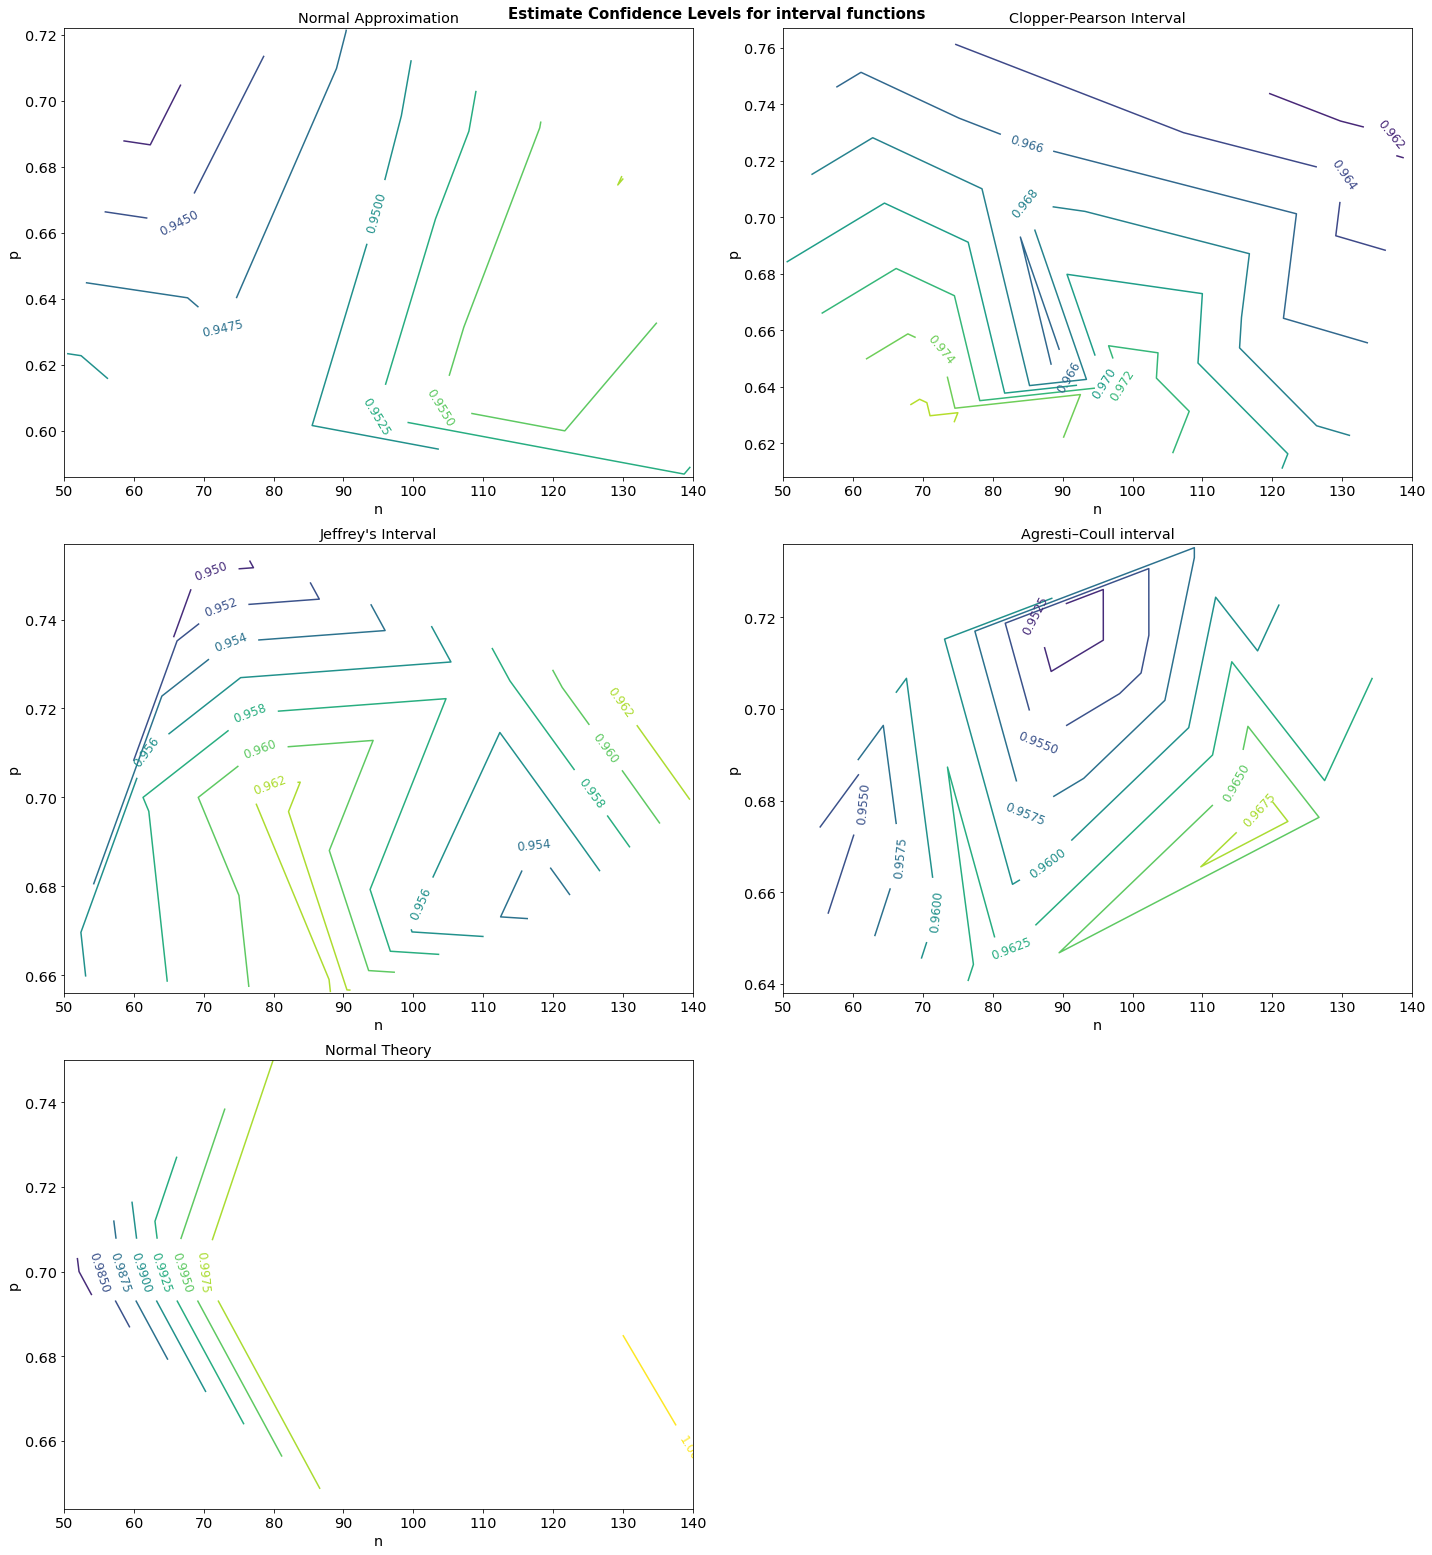

In [46]:
#Finalizing the x,y,z and values for the plot
data_plot = data1.reset_index()

# Contour Plotting the levels
fig1, ax1 = plt.subplots(ncols = 2, nrows = 3)

# #Normal Approximation
data_plot1 = data_plot.query('function == "Normal Approximation"')
n_plot = np.array(data_plot1['n'])
p_plot = np.array(data_plot1['p'])
levels = np.array(data_plot1['levels'])

_ = ax1[0][0].tricontour(n_plot, p_plot, levels)
_ = ax1[0][0].clabel(_, inline=True, fontsize=12)
_ = ax1[0][0].set_xlabel('n')
_ = ax1[0][0].set_ylabel('p')

ax1[0][0].set_title('Normal Approximation')

#Clopper-Pearson Interval
data_plot2 = data_plot.query('function == "Clopper-Pearson Interval"')
n_plot = np.array(data_plot2['n'])
p_plot = np.array(data_plot2['p'])
levels = np.array(data_plot2['levels'])

_ = ax1[0][1].tricontour(n_plot, p_plot, levels)
_ = ax1[0][1].clabel(_, inline=True, fontsize=12)
_ = ax1[0][1].set_xlabel('n')
_ = ax1[0][1].set_ylabel('p')
ax1[0][1].set_title('Clopper-Pearson Interval')

#Jeffrey's Interval
data_plot3 = data_plot.query('function == "Jeffrey\'s Interval"')
n_plot = np.array(data_plot3['n'])
p_plot = np.array(data_plot3['p'])
levels = np.array(data_plot3['levels'])

_ = ax1[1][0].tricontour(n_plot, p_plot, levels)
_ = ax1[1][0].clabel(_, inline=True, fontsize=12)
_ = ax1[1][0].set_xlabel('n')
_ = ax1[1][0].set_ylabel('p')
ax1[1][0].set_title('Jeffrey\'s Interval')


#Agresti–Coull interval
data_plot4 = data_plot.query('function == "Agresti–Coull interval"')
n_plot = np.array(data_plot4['n'])
p_plot = np.array(data_plot4['p'])
levels = np.array(data_plot4['levels'])

_ = ax1[1][1].tricontour(n_plot, p_plot, levels)
_ = ax1[1][1].clabel(_, inline=True, fontsize=12)
_ = ax1[1][1].set_xlabel('n')
_ = ax1[1][1].set_ylabel('p')
ax1[1][1].set_title('Agresti–Coull interval')

# Normal Theory
data_plot5 = data_plot.query('function == "Normal Theory"')
n_plot = np.array(data_plot5['n'])
p_plot = np.array(data_plot5['p'])
levels = np.array(data_plot5['levels'])

_ = ax1[2][0].tricontour(n_plot, p_plot, levels)
_ = ax1[2][0].clabel(_, inline=True, fontsize=12)
_ = ax1[2][0].set_xlabel('n')
_ = ax1[2][0].set_ylabel('p')
ax1[2][0].set_title('Normal Theory')

ax1[2][1].set_visible(False)

fig1.suptitle('Estimate Confidence Levels for interval functions',
              fontsize = 15, fontweight = 'bold')
fig1.subplots_adjust(top = 0.60)

fig1.tight_layout()

plt.show()

### b.

Using the Pandas table above, we can get the 
lower and upper intervals for different interval
functions, as estimated using the monte carlo simulation.

In [47]:
# Adding the average width column
data1['width'] = data1['upper'] - data1['lower']

#### Contour Plot to show the average width

Using the pandas table `data1` specified above , 
we can use the confidence intervals to make a contour plot

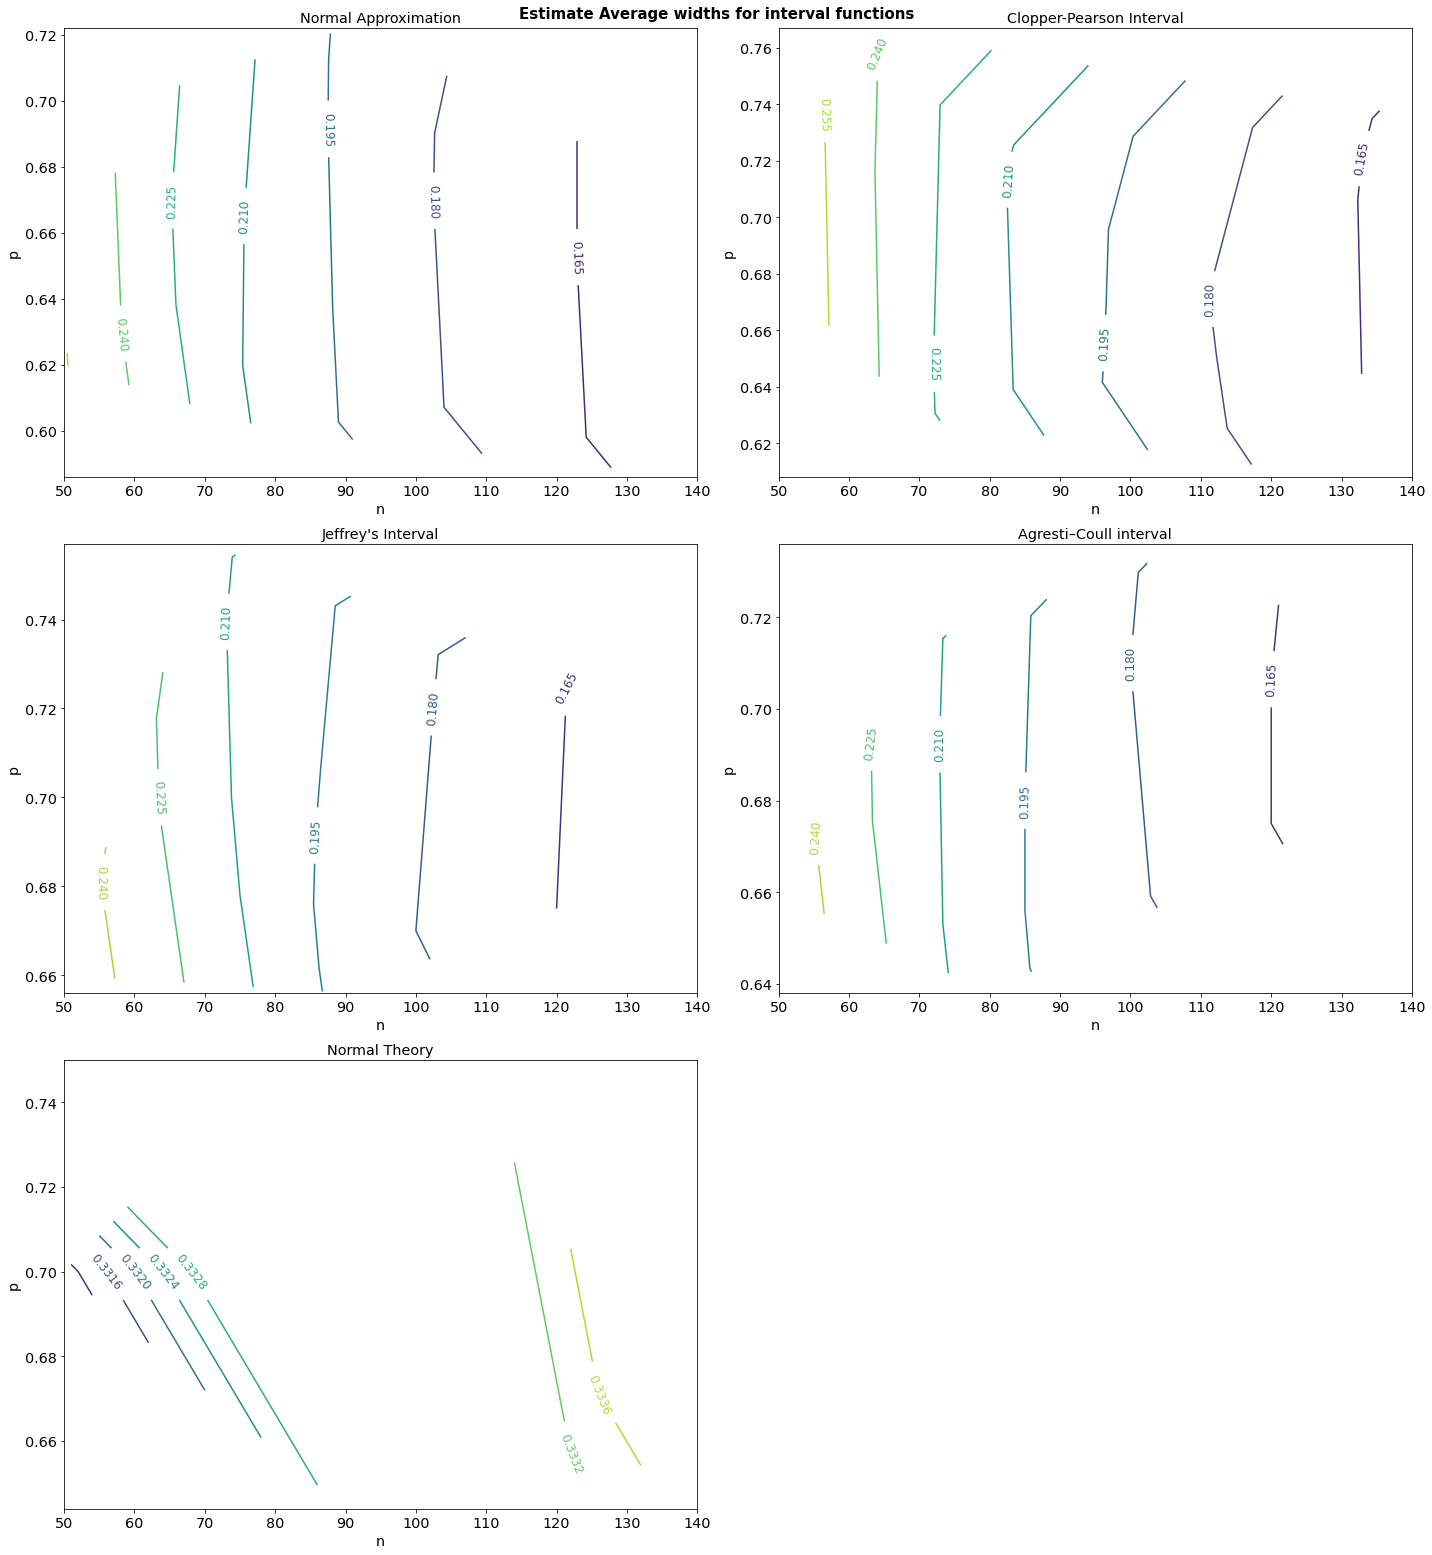

In [48]:
#Finalizing the x,y,z and values for the plot
data_plot = data1.reset_index()

# Contour Plotting the levels
fig1, ax1 = plt.subplots(ncols = 2, nrows = 3)

# #Normal Approximation
data_plot1 = data_plot.query('function == "Normal Approximation"')
n_plot = np.array(data_plot1['n'])
p_plot = np.array(data_plot1['p'])
widths = np.array(data_plot1['width'])

_ = ax1[0][0].tricontour(n_plot, p_plot, widths)
_ = ax1[0][0].clabel(_, inline=True, fontsize=12)
_ = ax1[0][0].set_xlabel('n')
_ = ax1[0][0].set_ylabel('p')

ax1[0][0].set_title('Normal Approximation')

#Clopper-Pearson Interval
data_plot2 = data_plot.query('function == "Clopper-Pearson Interval"')
n_plot = np.array(data_plot2['n'])
p_plot = np.array(data_plot2['p'])
widths = np.array(data_plot2['width'])

_ = ax1[0][1].tricontour(n_plot, p_plot, widths)
_ = ax1[0][1].clabel(_, inline=True, fontsize=12)
_ = ax1[0][1].set_xlabel('n')
_ = ax1[0][1].set_ylabel('p')
ax1[0][1].set_title('Clopper-Pearson Interval')

#Jeffrey's Interval
data_plot3 = data_plot.query('function == "Jeffrey\'s Interval"')
n_plot = np.array(data_plot3['n'])
p_plot = np.array(data_plot3['p'])
widths = np.array(data_plot3['width'])

_ = ax1[1][0].tricontour(n_plot, p_plot, widths)
_ = ax1[1][0].clabel(_, inline=True, fontsize=12)
_ = ax1[1][0].set_xlabel('n')
_ = ax1[1][0].set_ylabel('p')
ax1[1][0].set_title('Jeffrey\'s Interval')


#Agresti–Coull interval
data_plot4 = data_plot.query('function == "Agresti–Coull interval"')
n_plot = np.array(data_plot4['n'])
p_plot = np.array(data_plot4['p'])
widths = np.array(data_plot4['width'])

_ = ax1[1][1].tricontour(n_plot, p_plot, widths)
_ = ax1[1][1].clabel(_, inline=True, fontsize=12)
_ = ax1[1][1].set_xlabel('n')
_ = ax1[1][1].set_ylabel('p')
ax1[1][1].set_title('Agresti–Coull interval')

# Normal Theory
data_plot5 = data_plot.query('function == "Normal Theory"')
n_plot = np.array(data_plot5['n'])
p_plot = np.array(data_plot5['p'])
widths = np.array(data_plot5['width'])

_ = ax1[2][0].tricontour(n_plot, p_plot, widths)
_ = ax1[2][0].clabel(_, inline=True, fontsize=12)
_ = ax1[2][0].set_xlabel('n')
_ = ax1[2][0].set_ylabel('p')
ax1[2][0].set_title('Normal Theory')

ax1[2][1].set_visible(False)

fig1.suptitle('Estimate Average widths for interval functions', 
              fontsize = 15, fontweight = 'bold')

fig1.tight_layout()

plt.show()

#### Calculating the relative width of the methods (against Clopper-Pearson)

In [49]:
# Adding the relative width column
clopper_width = []
data_copy = data1.reset_index()
clopper_width = data_copy.query('function == "Clopper-Pearson Interval"')['width']
clopper_width = list(round(clopper_width, ndigits = 3)) * 5
data_copy['rel_width'] = round(data_copy['width'] - clopper_width, ndigits = 5)

#### Contour Plot to show the average relative width

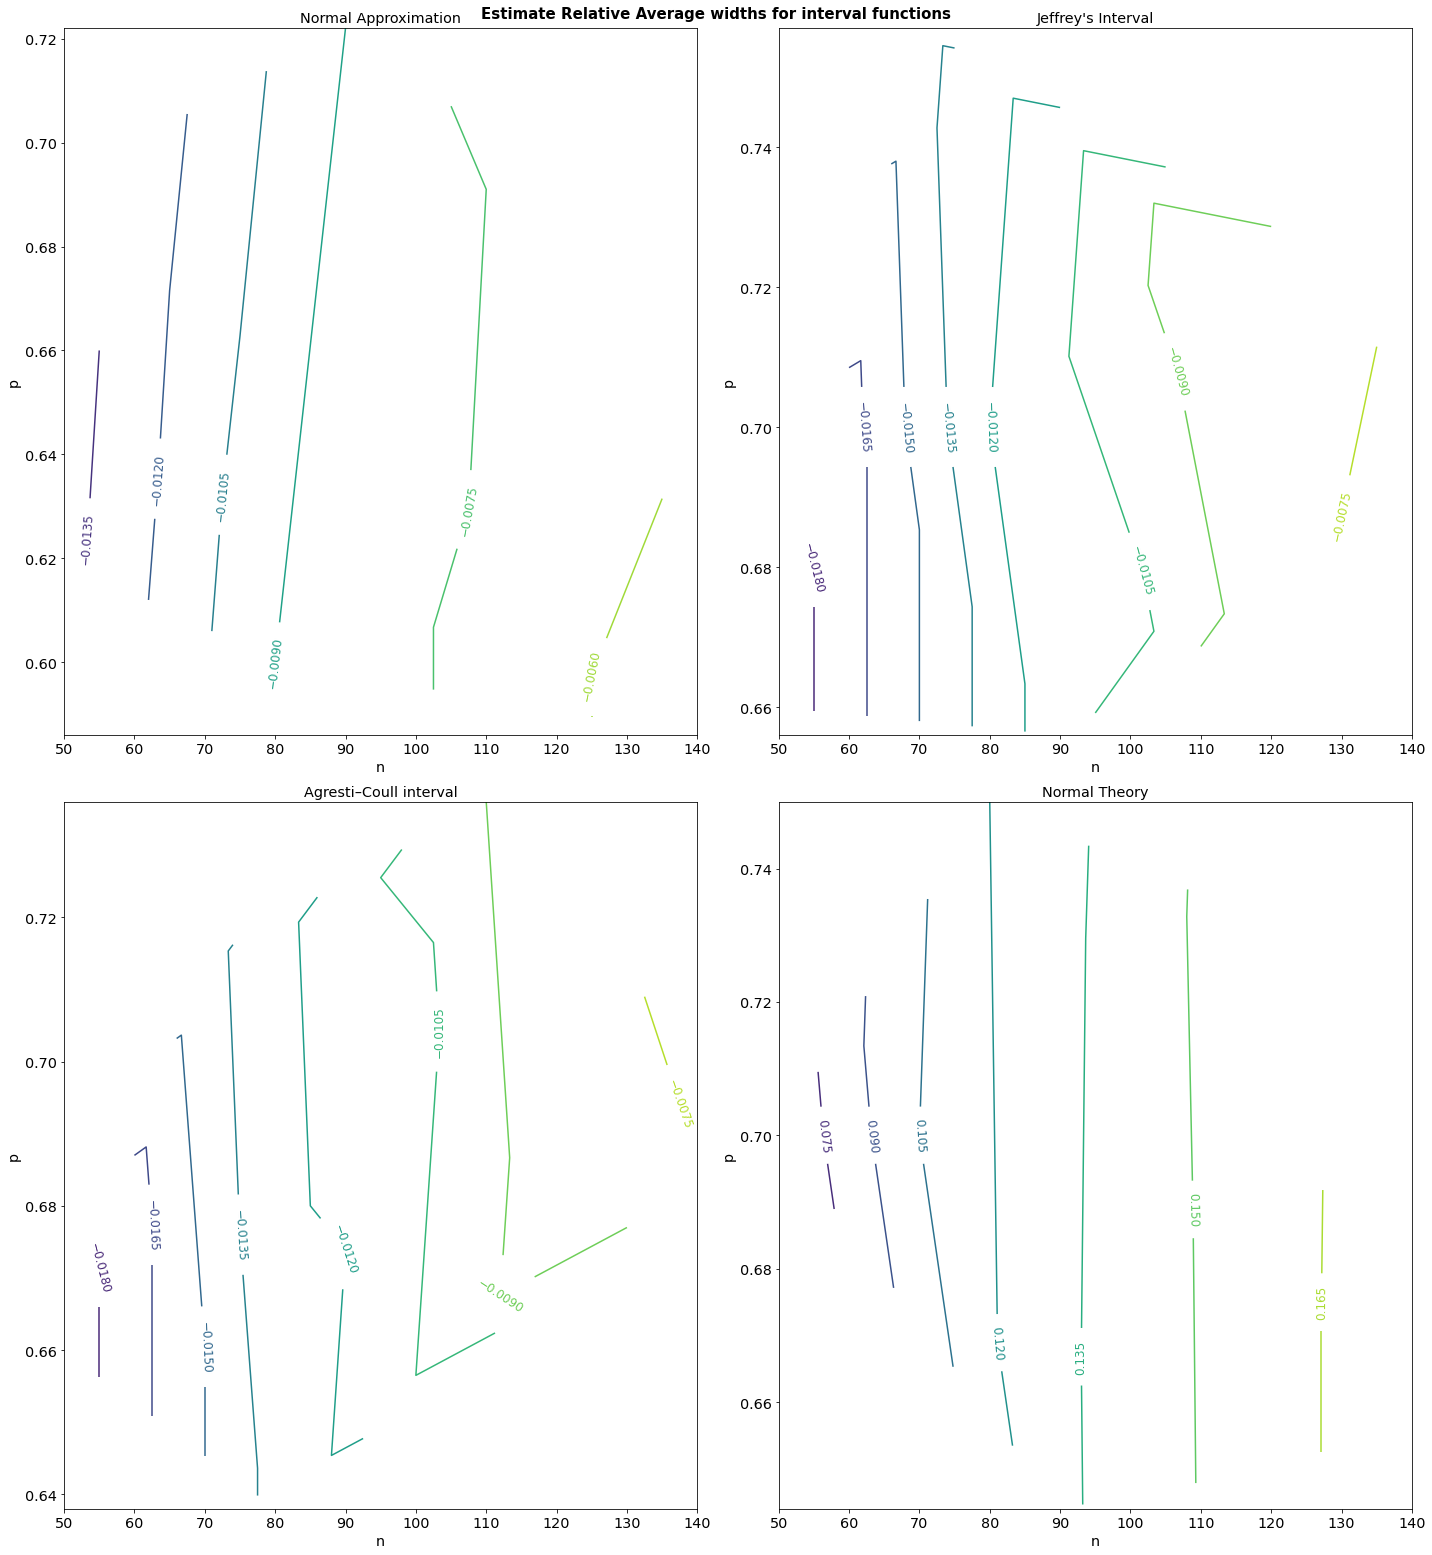

In [50]:
#Finalizing the x,y,z and values for the plot

# Contour Plotting the levels
fig1, ax1 = plt.subplots(ncols = 2, nrows = 2)

# #Normal Approximation
data_plot1 = data_copy.query('function == "Normal Approximation"')
n_plot = np.array(data_plot1['n'])
p_plot = np.array(data_plot1['p'])
rel_widths = np.array(data_plot1['rel_width'])

_ = ax1[0][0].tricontour(n_plot, p_plot, rel_widths)
_ = ax1[0][0].clabel(_, inline=True, fontsize=12)
_ = ax1[0][0].set_xlabel('n')
_ = ax1[0][0].set_ylabel('p')

ax1[0][0].set_title('Normal Approximation')

#Jeffrey's Interval
data_plot3 = data_copy.query('function == "Jeffrey\'s Interval"')
n_plot = np.array(data_plot3['n'])
p_plot = np.array(data_plot3['p'])
rel_widths = np.array(data_plot3['rel_width'])

_ = ax1[0][1].tricontour(n_plot, p_plot, rel_widths)
_ = ax1[0][1].clabel(_, inline=True, fontsize=12)
_ = ax1[0][1].set_xlabel('n')
_ = ax1[0][1].set_ylabel('p')
ax1[0][1].set_title('Jeffrey\'s Interval')


#Agresti–Coull interval
data_plot4 = data_copy.query('function == "Agresti–Coull interval"')
n_plot = np.array(data_plot4['n'])
p_plot = np.array(data_plot4['p'])
rel_widths = np.array(data_plot4['rel_width'])

_ = ax1[1][0].tricontour(n_plot, p_plot, rel_widths)
_ = ax1[1][0].clabel(_, inline=True, fontsize=12)
_ = ax1[1][0].set_xlabel('n')
_ = ax1[1][0].set_ylabel('p')
ax1[1][0].set_title('Agresti–Coull interval')

# Normal Theory
data_plot5 = data_copy.query('function == "Normal Theory"')
n_plot = np.array(data_plot5['n'])
p_plot = np.array(data_plot5['p'])
rel_widths = np.array(data_plot5['rel_width'])

_ = ax1[1][1].tricontour(n_plot, p_plot, rel_widths)
_ = ax1[1][1].clabel(_, inline=True, fontsize=12)
_ = ax1[1][1].set_xlabel('n')
_ = ax1[1][1].set_ylabel('p')
ax1[1][1].set_title('Normal Theory')

fig1.suptitle('Estimate Relative Average widths for interval functions', 
              fontsize = 15, fontweight = 'bold')

fig1.tight_layout()

plt.show()